<a href="https://colab.research.google.com/github/PTson2207/Classification-WBC/blob/main/Second_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import csv
import cv2
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import  np_utils
from keras.preprocessing.image import  ImageDataGenerator
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import  Adam

    Image generator

In [2]:
def image_processing(train_path, valid_path, test_path, batch_size):
    define_train = ImageDataGenerator(rescale=1./255)
    train_generator = define_train.flow_from_directory(train_path,
                                                 target_size=image_size,
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 subset='training')
    
    define_valid = ImageDataGenerator(rescale=1./255)
    validation_generator = define_valid.flow_from_directory(valid_path,
                                                            target_size=image_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical')
    
    define_test = ImageDataGenerator(rescale=1./255)
    test_generator = define_test.flow_from_directory(test_path,
                                                     target_size=image_size,
                                                     batch_size=batch_size,
                                                     shuffle=False,
                                                     class_mode='categorical')
    
    return train_generator, validation_generator, test_generator

In [3]:
batch_size=32
image_size=(160, 120)
input_shape=(120, 160, 3)
epochs=25
train_path = "/content/drive/MyDrive/WBC_classification/Data/TRAIN/"
test_path = "/content/drive/MyDrive/WBC_classification/Data/TEST/"
valid_path = "/content/drive/MyDrive/WBC_classification/Data/VALID/"

In [4]:
image_generator = image_processing(train_path, valid_path, test_path, batch_size)

Found 5000 images belonging to 5 classes.
Found 2836 images belonging to 5 classes.
Found 1733 images belonging to 5 classes.


    Load model and visualize

In [10]:
def fit_transform(model, model_name, image_generator, batch_size, epochs, num_train_img, num_val_img):
    print(model.summary())
    history = model.fit(image_generator[0],
                                  #steps_per_epoch=num_train_img // batch_size,
                                  epochs=epochs,
                                  validation_data=image_generator[1])
                                  #validation_steps=num_val_img // batch_size)
    
    # visualize

    # Loss
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], 'red', linewidth=3.0)
    plt.plot(history.history['val_loss'], 'yellow', linewidth=3.0)
    plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.title('Loss model {}'.format(model_name), fontsize=15)

    #Acc
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], 'red', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'yellow', linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.title('Accuracy model {}'.format(model_name), fontsize=15)

    print('Validation Accuracy:',history.history['val_acc'][-1])

    build model

In [6]:
    model_name = "WBC Classification"
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(120, 160, 3), output_shape=(120, 160, 3)))
    model.add(Conv2D(32, (3, 3), input_shape=(120, 160, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.0001),
                metrics=['accuracy'])

    Training Data

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 120, 160, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 118, 158, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 118, 158, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 77, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 57, 77, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 38, 32)        0

KeyError: ignored

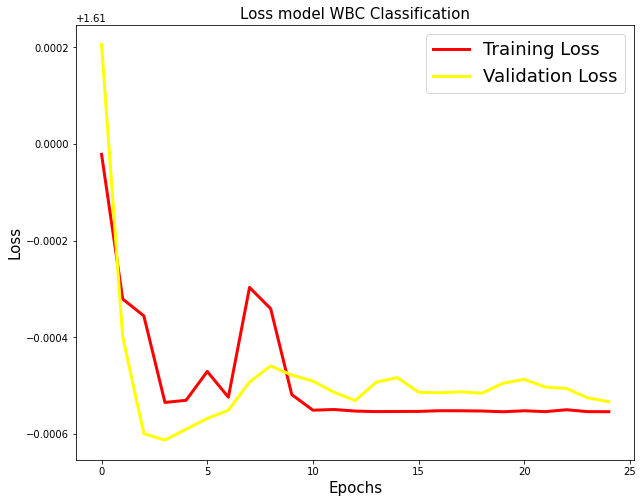

<Figure size 576x432 with 0 Axes>

In [9]:
fit_transform(model, model_name, image_generator, batch_size, epochs, 5000, 2836)